In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

In [2]:
#look at data set basics
len(mouse) #250 observations
mouse['Mouse ID'].nunique() #249 unique mice IDs in mouse
len(clinical) #clinical is significantly longer at 1893
clinical['Mouse ID'].nunique() #249 unique mice IDs in clinical


249

In [3]:
# Combine the data into a single dataset
merged = pd.merge(clinical, mouse,  how = 'right', on = 'Mouse ID') 
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#take a look at the new data set to ensure merge was successful
merged['Mouse ID'].nunique() #249 unique mice IDs, looks good
merged.isna().sum() #check for NAs, there are none

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug                  0
dtype: int64

#  Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_grouped = merged.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
tumor_mean = drug_grouped.mean()

#reset index for easy manipulation later
tumor_mean = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se1 = drug_grouped.sem()

# Convert to DataFrame
tumor_se = pd.DataFrame(tumor_se1)

# reset index for easier manipulation
tumor_se.reset_index(inplace=True)
tumor_se.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot = tumor_mean.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview, format looks good
tumor_mean_pivot.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


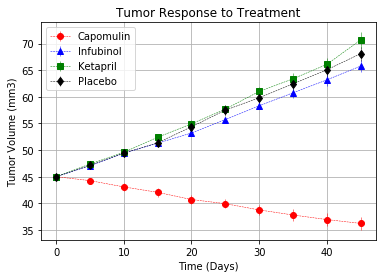

In [8]:
#Create the plot, list of drugs/format to includle, forloop
drug_formatting = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')] 
for drug,marker,colors in drug_formatting:
    ste = tumor_se1[drug]
    tumor_treatment_plt = plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Save the Figure
plt.savefig('Tumor_Response.png')

# Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_grouped = merged.groupby(['Drug','Timepoint'])['Metastatic Sites'] #create groupby object
metatastic_mean = drug_grouped.mean() #group mean

In [10]:
#reset index for easy manipulation later
tumor_mean = metatastic_mean.reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_se = drug_grouped.sem()

#reset index for easy manipulation later
met_se1 = met_se.reset_index()

# Preview DataFrame
met_se1.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_pivot = tumor_mean.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
tumor_met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


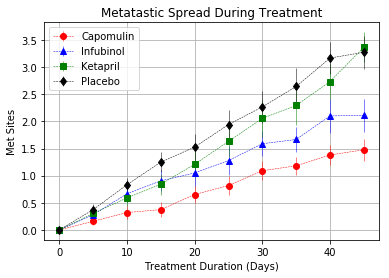

In [13]:
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_formatting:
    ste = met_se[drug]
    tumor_treatment_plt_met = plt.errorbar(tumor_met_pivot.index,tumor_met_pivot[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Metatastic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met Sites')
plt.grid()

# Save the Figure
plt.savefig('Metatastic_Spread_During_Treatment.png')

#  Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_ID = merged.groupby(['Drug', 'Timepoint'])['Mouse ID']
mouse_count = mouse_ID.nunique() #count the individual values of mice to see how many were alive
mouse_count_df = pd.DataFrame(data = mouse_count)
mouse_count_df.head() #check the data frame, looks good

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [15]:
#reset index for easy manipulation later
mouse_count_df = mouse_count_df.reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
 # Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')
# Preview the Data Frame
mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


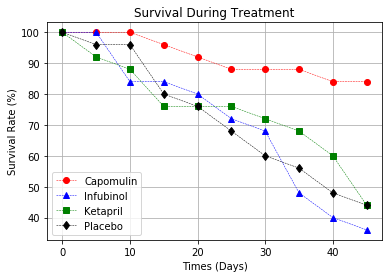

In [17]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_formatting: #drug marker is the same var used in previous 3 graphs
    total_mouse = mouse_count_pivot[drug][0]
    survival_rate = (mouse_count_pivot[drug]/total_mouse)*100 #account for percentages in the graph
    survival_treatment_plt = plt.plot(mouse_count_pivot.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig('Survival_Rate.png')


# Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
percentage_change = (tumor_mean_pivot.iloc[-1]/(tumor_mean_pivot.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [19]:
# Store all Relevant Percent Changes into a Tuple
percentage_tuple = tuple(percentage_change)
percentage_tuple


(-19.475302667894155,
 42.51649185589741,
 46.12347172785185,
 57.02879468660604,
 53.92334713476919,
 51.29796048315151,
 47.24117486320634,
 -22.32090046276666,
 52.085134287899,
 46.57975086509523)

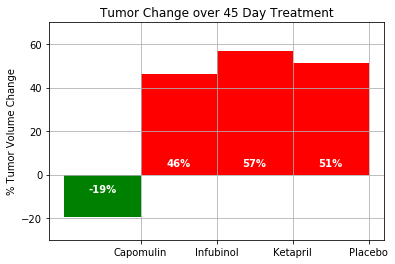

In [20]:
# Splice the data between passing and failing drugs
passing = percentage_change < 0 #define passing for color coding later

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change = [(percentage_change[drug])for drug in drug_list]
change_overview = plt.bar(drug_list,change,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 3
        else:
            label_position = -9
        plt.text(rect.get_x() + rect.get_width()/2., label_position,'%d' % int(height)+'%',color='white',weight= 'bold', ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(change_overview)

# Save the Figure
plt.savefig('Tumor_change_45days.png')